<a href="https://colab.research.google.com/github/PreethamThinagaraj/Projects/blob/main/ML/Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#reading the data
p3_data=pd.read_csv("E:/ML Project/CE802_P3_Data/CE802_P3_Data.csv")

In [ ]:
p3_data.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.32,5.72,-13.83,High,UK,0.03,-200.46,122.09,-2.96,6,2.67,8,607.14,19.19,10523.40,-635.80,1051.99
1,-29.38,8.20,-11.07,Medium,UK,56.97,-427.78,74.25,-22.94,4,3.84,10,867.03,12.65,10037.04,-469.73,816.64
2,2.46,20.32,-7.59,Low,Rest,45.00,-329.02,96.98,-10.90,4,13.14,8,-153.66,13.01,15100.28,-662.31,3241.77
3,16.33,2.76,-8.40,High,Rest,0.12,-196.88,42.45,-12.16,12,1.29,6,1461.87,9.19,22518.15,-1100.35,0.00
4,-14.93,9.98,-5.28,Medium,USA,557.61,-249.50,76.25,-20.54,8,2.58,2,-433.89,18.44,20111.46,-752.48,0.00


In [ ]:
p3_data.shape

(1500, 17)

In [ ]:
p3_data.dtypes

F1        float64
F2        float64
F3        float64
F4         object
F5         object
F6        float64
F7        float64
F8        float64
F9        float64
F10         int64
F11       float64
F12         int64
F13       float64
F14       float64
F15       float64
F16       float64
Target    float64
dtype: object

In [ ]:
#checking for null values
p3_data.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
Target    0
dtype: int64

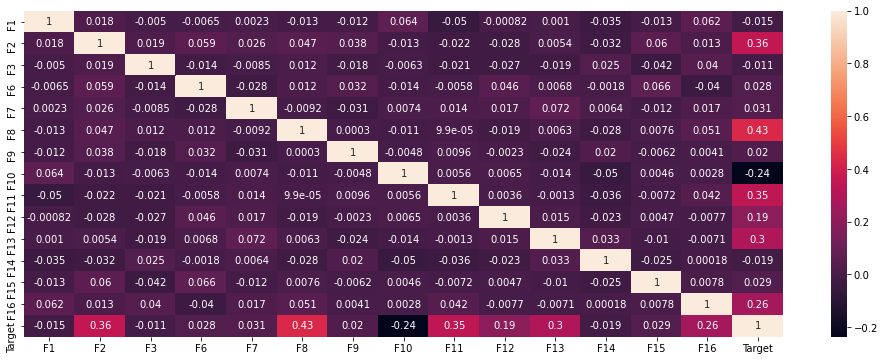

In [ ]:
#correlation heat map
fig, ax = plt.subplots(figsize=(17,6))
sns.heatmap(p3_data.corr(), annot=True,ax=ax)
plt.show()

<AxesSubplot:xlabel='F4', ylabel='Target'>

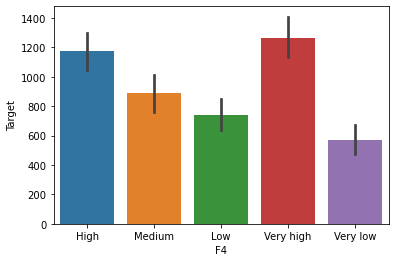

In [ ]:
#checking the impact of the categorical variables on the target variable using a barplot
sns.barplot(x='F4', y='Target', data=p3_data)

<AxesSubplot:xlabel='F5', ylabel='Target'>

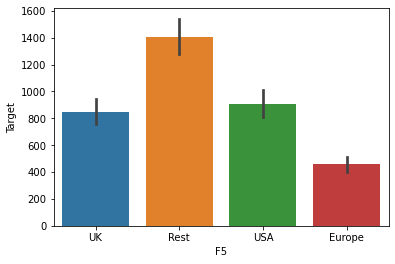

In [ ]:
#checking the impact of the categorical variables on the target variable using a barplot
sns.barplot(x='F5', y='Target', data=p3_data)

In [ ]:
#creating dummies to convert categorical columns to integer
dummies1  = pd.get_dummies(p3_data['F4'])

In [ ]:
dummies1.drop(['Very low'], axis=1, inplace=True)

In [ ]:
dummies1

,High,Low,Medium,Very high
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
1495,1,0,0,0
1496,1,0,0,0
1497,0,0,0,0
1498,0,0,0,1


In [ ]:
dummies2  = pd.get_dummies(p3_data['F5'])

In [ ]:
dummies2.drop(['Europe'], axis=1, inplace=True)

In [ ]:
dummies2

,Rest,UK,USA
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
1495,0,0,0
1496,0,0,1
1497,1,0,0
1498,0,0,1


In [ ]:
#combining the dummies along with the original data
master_df=pd.concat([p3_data,dummies1,dummies2],axis=1)

In [ ]:
master_df.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F15,F16,Target,High,Low,Medium,Very high,Rest,UK,USA
0,-39.32,5.72,-13.83,High,UK,0.03,-200.46,122.09,-2.96,6,...,10523.40,-635.80,1051.99,1,0,0,0,0,1,0
1,-29.38,8.20,-11.07,Medium,UK,56.97,-427.78,74.25,-22.94,4,...,10037.04,-469.73,816.64,0,0,1,0,0,1,0
2,2.46,20.32,-7.59,Low,Rest,45.00,-329.02,96.98,-10.90,4,...,15100.28,-662.31,3241.77,0,1,0,0,1,0,0
3,16.33,2.76,-8.40,High,Rest,0.12,-196.88,42.45,-12.16,12,...,22518.15,-1100.35,0.00,1,0,0,0,1,0,0
4,-14.93,9.98,-5.28,Medium,USA,557.61,-249.50,76.25,-20.54,8,...,20111.46,-752.48,0.00,0,0,1,0,0,0,1


In [ ]:
#dropping the categorical columns
master_df=master_df.drop(['F4','F5'],axis=1)

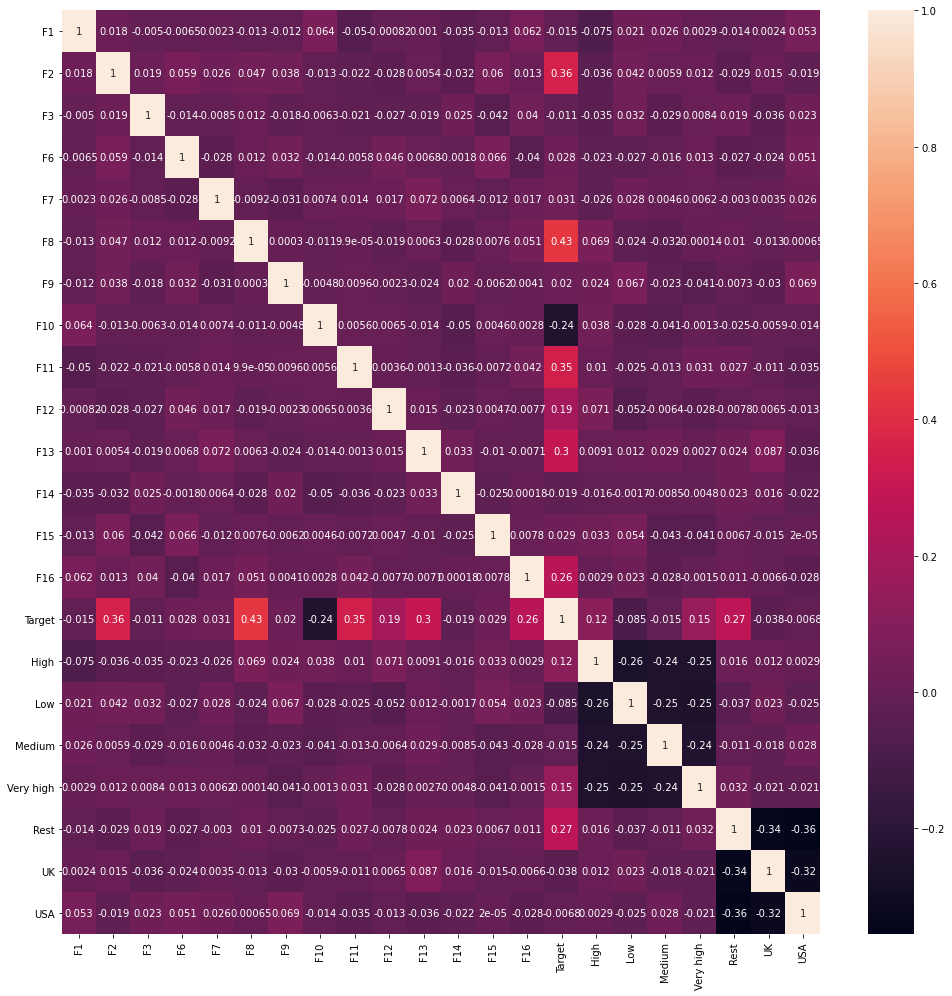

In [ ]:
#correlation heat map of the final data that is going to be used for training the model
fig, ax = plt.subplots(figsize=(17,17))
sns.heatmap(master_df.corr(), annot=True,ax=ax)
plt.show()

In [ ]:
master_df.head(5)

,F1,F2,F3,F6,F7,F8,F9,F10,F11,F12,...,F15,F16,Target,High,Low,Medium,Very high,Rest,UK,USA
0,-39.32,5.72,-13.83,0.03,-200.46,122.09,-2.96,6,2.67,8,...,10523.40,-635.80,1051.99,1,0,0,0,0,1,0
1,-29.38,8.20,-11.07,56.97,-427.78,74.25,-22.94,4,3.84,10,...,10037.04,-469.73,816.64,0,0,1,0,0,1,0
2,2.46,20.32,-7.59,45.00,-329.02,96.98,-10.90,4,13.14,8,...,15100.28,-662.31,3241.77,0,1,0,0,1,0,0
3,16.33,2.76,-8.40,0.12,-196.88,42.45,-12.16,12,1.29,6,...,22518.15,-1100.35,0.00,1,0,0,0,1,0,0
4,-14.93,9.98,-5.28,557.61,-249.50,76.25,-20.54,8,2.58,2,...,20111.46,-752.48,0.00,0,0,1,0,0,0,1


In [ ]:
master_df.dtypes

F1           float64
F2           float64
F3           float64
F6           float64
F7           float64
F8           float64
F9           float64
F10            int64
F11          float64
F12            int64
F13          float64
F14          float64
F15          float64
F16          float64
Target       float64
High           uint8
Low            uint8
Medium         uint8
Very high      uint8
Rest           uint8
UK             uint8
USA            uint8
dtype: object

In [ ]:
#storing the target variable and the feature columns seperately to train the models
X= master_df.drop(["Target","F3"],axis=1)#F3 is dropped as part of feature selection
Y = master_df.Target

In [ ]:
X.head(5)

,F1,F2,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,High,Low,Medium,Very high,Rest,UK,USA
0,-39.32,5.72,0.03,-200.46,122.09,-2.96,6,2.67,8,607.14,19.19,10523.40,-635.80,1,0,0,0,0,1,0
1,-29.38,8.20,56.97,-427.78,74.25,-22.94,4,3.84,10,867.03,12.65,10037.04,-469.73,0,0,1,0,0,1,0
2,2.46,20.32,45.00,-329.02,96.98,-10.90,4,13.14,8,-153.66,13.01,15100.28,-662.31,0,1,0,0,1,0,0
3,16.33,2.76,0.12,-196.88,42.45,-12.16,12,1.29,6,1461.87,9.19,22518.15,-1100.35,1,0,0,0,1,0,0
4,-14.93,9.98,557.61,-249.50,76.25,-20.54,8,2.58,2,-433.89,18.44,20111.46,-752.48,0,0,1,0,0,0,1


In [ ]:
Y.head(5)

0    1051.99
1     816.64
2    3241.77
3       0.00
4       0.00
Name: Target, dtype: float64

# data normilization for models which perform better with normalization

In [ ]:
#dropping the categorical columns
p3_data=p3_data.drop(['F4','F5'],axis=1)
p3_data.head(5)

,F1,F2,F3,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.32,5.72,-13.83,0.03,-200.46,122.09,-2.96,6,2.67,8,607.14,19.19,10523.40,-635.80,1051.99
1,-29.38,8.20,-11.07,56.97,-427.78,74.25,-22.94,4,3.84,10,867.03,12.65,10037.04,-469.73,816.64
2,2.46,20.32,-7.59,45.00,-329.02,96.98,-10.90,4,13.14,8,-153.66,13.01,15100.28,-662.31,3241.77
3,16.33,2.76,-8.40,0.12,-196.88,42.45,-12.16,12,1.29,6,1461.87,9.19,22518.15,-1100.35,0.00
4,-14.93,9.98,-5.28,557.61,-249.50,76.25,-20.54,8,2.58,2,-433.89,18.44,20111.46,-752.48,0.00


In [ ]:
#storing the feature columns
X_normalised= p3_data.drop(["Target"],axis=1)
X_normalised.head(5)

,F1,F2,F3,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16
0,-39.32,5.72,-13.83,0.03,-200.46,122.09,-2.96,6,2.67,8,607.14,19.19,10523.40,-635.80
1,-29.38,8.20,-11.07,56.97,-427.78,74.25,-22.94,4,3.84,10,867.03,12.65,10037.04,-469.73
2,2.46,20.32,-7.59,45.00,-329.02,96.98,-10.90,4,13.14,8,-153.66,13.01,15100.28,-662.31
3,16.33,2.76,-8.40,0.12,-196.88,42.45,-12.16,12,1.29,6,1461.87,9.19,22518.15,-1100.35
4,-14.93,9.98,-5.28,557.61,-249.50,76.25,-20.54,8,2.58,2,-433.89,18.44,20111.46,-752.48


In [ ]:
#storing the target column
Y_normalised = p3_data.drop(["F1","F2","F3","F6","F7","F8","F9","F10","F11","F12","F13","F14","F15","F16"],axis=1)
Y_normalised.head(5)

,Target
0,1051.99
1,816.64
2,3241.77
3,0.00
4,0.00


In [ ]:
#creating a list of headers 
col_names_x = list(X_normalised.columns)
col_names_x

['F1',
 'F2',
 'F3',
 'F6',
 'F7',
 'F8',
 'F9',
 'F10',
 'F11',
 'F12',
 'F13',
 'F14',
 'F15',
 'F16']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# perform a robust scaler transform of the dataset
trans_x = MinMaxScaler()
trans_y = MinMaxScaler()
data_x = trans_x.fit_transform(X_normalised)
data_y = trans_y.fit_transform(Y_normalised)

In [ ]:
data_y

array([[0.26565337],
       [0.2062217 ],
       [0.81862672],
       ...,
       [0.27036043],
       [0.        ],
       [0.50219318]])

In [ ]:
#converting the array into a dataframe
dataset = pd.DataFrame(data_x,columns=col_names_x)
dataset.head(5)

,F1,F2,F3,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16
0,0.360186,0.125166,0.409712,3.639735e-07,0.581055,0.610961,0.825474,0.3,0.036403,0.363636,0.512636,0.478459,0.381224,0.546042
1,0.404573,0.180204,0.456247,6.911856e-04,0.339979,0.361976,0.284011,0.2,0.053105,0.454545,0.554724,0.329382,0.369100,0.626001
2,0.546754,0.449179,0.514922,5.459602e-04,0.444715,0.480275,0.610298,0.2,0.185867,0.363636,0.389430,0.337588,0.495317,0.533277
3,0.608690,0.059476,0.501265,1.455894e-06,0.584852,0.196471,0.576152,0.6,0.016702,0.272727,0.651054,0.250513,0.680231,0.322370
4,0.469099,0.219707,0.553869,6.765175e-03,0.529047,0.372385,0.349051,0.4,0.035118,0.090909,0.344049,0.461363,0.620237,0.489862


In [ ]:
#combining the normilized data with the dummies
norm_df=pd.concat([dataset,dummies1,dummies2],axis=1)
norm_df.head(5)

,F1,F2,F3,F6,F7,F8,F9,F10,F11,F12,...,F14,F15,F16,High,Low,Medium,Very high,Rest,UK,USA
0,0.360186,0.125166,0.409712,3.639735e-07,0.581055,0.610961,0.825474,0.3,0.036403,0.363636,...,0.478459,0.381224,0.546042,1,0,0,0,0,1,0
1,0.404573,0.180204,0.456247,6.911856e-04,0.339979,0.361976,0.284011,0.2,0.053105,0.454545,...,0.329382,0.369100,0.626001,0,0,1,0,0,1,0
2,0.546754,0.449179,0.514922,5.459602e-04,0.444715,0.480275,0.610298,0.2,0.185867,0.363636,...,0.337588,0.495317,0.533277,0,1,0,0,1,0,0
3,0.608690,0.059476,0.501265,1.455894e-06,0.584852,0.196471,0.576152,0.6,0.016702,0.272727,...,0.250513,0.680231,0.322370,1,0,0,0,1,0,0
4,0.469099,0.219707,0.553869,6.765175e-03,0.529047,0.372385,0.349051,0.4,0.035118,0.090909,...,0.461363,0.620237,0.489862,0,0,1,0,0,0,1


In [ ]:
X_norm= norm_df.drop(["F3"],axis=1)# F3 is dropped as part of feature selection since it has the least correlation
Y_norm=data_y #target variable is already in data_y

In [ ]:
X_norm.head(5)

,F1,F2,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,High,Low,Medium,Very high,Rest,UK,USA
0,0.360186,0.125166,3.639735e-07,0.581055,0.610961,0.825474,0.3,0.036403,0.363636,0.512636,0.478459,0.381224,0.546042,1,0,0,0,0,1,0
1,0.404573,0.180204,6.911856e-04,0.339979,0.361976,0.284011,0.2,0.053105,0.454545,0.554724,0.329382,0.369100,0.626001,0,0,1,0,0,1,0
2,0.546754,0.449179,5.459602e-04,0.444715,0.480275,0.610298,0.2,0.185867,0.363636,0.389430,0.337588,0.495317,0.533277,0,1,0,0,1,0,0
3,0.608690,0.059476,1.455894e-06,0.584852,0.196471,0.576152,0.6,0.016702,0.272727,0.651054,0.250513,0.680231,0.322370,1,0,0,0,1,0,0
4,0.469099,0.219707,6.765175e-03,0.529047,0.372385,0.349051,0.4,0.035118,0.090909,0.344049,0.461363,0.620237,0.489862,0,0,1,0,0,0,1


In [ ]:
#Y_norm.head(5)

In [ ]:
#data splitting for models which perform better with normalised data for training the model
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(X_norm,data_y,test_size=0.3)

In [ ]:
#creating a empty list to store the r2 score
score=[]
#creating the list of model names for plotting
Model_name=['Linear','RandomForest','SVR','Lasso','Ridge']

# Linear Regression

In [ ]:
#data splitting for models which perform better without normalization data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math
lm=linear_model.LinearRegression()

In [ ]:
scores = cross_val_score(lm, X , Y, cv=10) # using cross validation to technique to validate the model
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.78379945 0.82832052 0.74349088 0.76884408 0.721354   0.7547155
 0.7781361  0.8197063  0.78230074 0.80640219]


In [ ]:
#making predictions using cross validation to validate model
predictions = cross_val_predict(lm, X, Y, cv=10)
accuracy = metrics.r2_score(Y, predictions,multioutput='raw_values')
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: [0.78277185]


In [ ]:
scores = pd.Series(scores)
scores.mean()

0.778706975552811

In [ ]:
#fitting the model 
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
#making predictions
y_pred=lm.predict(x_test)

In [ ]:
#Generaing r2 score to check the performance of the model
Linear=metrics.r2_score(y_test, y_pred)
print("R2_score:\n",Linear)
score.append(Linear)

R2_score:
 0.7887106914014613


In [ ]:
#calculating the RMSE of the model 
MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

509.3039064246365


# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor()
scores=cross_val_score(rf_reg, X, Y, cv=10)# using cross validation to technique to validate the model
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.62492097 0.7360326  0.59219441 0.7404294  0.6548808  0.66511298
 0.67233781 0.7421723  0.63047821 0.64512885]


In [ ]:
#making predictions using cross validation to validate model
predictions = cross_val_predict(rf_reg, X, Y, cv=10)
accuracy = metrics.r2_score(Y, predictions,multioutput='raw_values')
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: [0.6772549]


In [ ]:
scores = pd.Series(scores)
scores.mean()

0.6703688320063683

In [ ]:
#fitting the model
rf_reg.fit(x_train,y_train.ravel())
#making predictions
y_pred=rf_reg.predict(x_test)
#Generaing r2 score to check the performance of the model
randomforest=metrics.r2_score(y_test, y_pred)
print("R2_score:\n",randomforest)
score.append(randomforest)

R2_score:
 0.7035281849595505


In [ ]:
#calculating the RMSE of the model 
MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

603.2953145180369


# SVR 

In [ ]:
#works with data normilizaton
from sklearn.svm import SVR
model=SVR()
scores=cross_val_score(model, X_norm, Y_norm.ravel(), cv=10)# using cross validation to technique to validate the model
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.86074738 0.89257223 0.86188965 0.86794864 0.83184081 0.84914476
 0.86567384 0.87113624 0.86030407 0.88356557]


In [ ]:
#making predictions using cross validation to validate model
predictions = cross_val_predict(model, X_norm, Y_norm.ravel(), cv=10)
accuracy = metrics.r2_score(Y_norm, predictions,multioutput='raw_values')
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: [0.86630946]


In [ ]:
scores = pd.Series(scores)
scores.mean()

0.864482318941006

In [ ]:
#fitting the model
model.fit(x1_train,y1_train.ravel())#using ravel to obtain a contiguous flattened array
#making predictions
y_pred=model.predict(x1_test)
#Generaing r2 score to check the performance of the model
metrics.r2_score(y1_test, y_pred)

0.8477354108558386

In [ ]:
#calculating the RMSE of the model 
MSE = mean_squared_error(y1_test, y_pred) 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.1063718854864203


In [ ]:
#grid search for tuning the parameters
parameters = {'kernel': ['linear', 'rbf','poly'], 'C':[0.1, 1, 1.5,10, 100, 1000,10000],'gamma': [1, 0.1, 0.01, 0.001,1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
from sklearn.model_selection import GridSearchCV
reg = GridSearchCV(model, parameters)
reg.fit(x1_train, y1_train.ravel())
reg.best_params_

{'C': 1000, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
#model with tuned parameters
model_t=SVR(C=1000,epsilon=0.1,gamma=0.01,kernel='rbf')
model_t.fit(x1_train,y1_train.ravel())
y_pred=model_t.predict(x1_test)
svr=metrics.r2_score(y1_test, y_pred)
print("R2_score:\n",svr)
score.append(svr)

R2_score:
 0.8652371139092487


In [ ]:
y_pred=y_pred.reshape(-1,1)

In [ ]:
#inversing the normilization
y_inv = trans_y.inverse_transform(y_pred) 

In [ ]:
#inversing the normilization
y_test_inv=trans_y.inverse_transform(y1_test)

In [ ]:
#calculating the RMSE of the model
MSE = mean_squared_error(y_test_inv, y_inv)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

396.28609517629127


# Lasso regression

In [ ]:
# import the regressor 
from sklearn import linear_model

 # create regressor object 
lasso_regressor = linear_model.Lasso()

scores=cross_val_score(lasso_regressor, X, Y, cv=10)# using cross validation to technique to validate the model
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.78244462 0.82950771 0.74298139 0.7700753  0.72042708 0.75318274
 0.77705452 0.82100912 0.78267331 0.80526863]


In [ ]:
#making predictions using cross validation to validate model
predictions = cross_val_predict(lasso_regressor, X, Y, cv=10)
accuracy = metrics.r2_score(Y, predictions,multioutput='raw_values')
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: [0.78259767]


In [ ]:
scores = pd.Series(scores)
scores.mean()

0.7784624414985689

In [ ]:
# fit the regressor with x and y data 
lasso_regressor.fit(x_train, y_train)

#Prediction of new values
y_pred = lasso_regressor.predict(x_test)

lasso=metrics.r2_score(y_test, y_pred)
print("R2_score:\n",lasso)
score.append(lasso)

R2_score:
 0.7878982110062415


In [ ]:
#calculating the RMSE of the model
MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

510.2821916120732


# Ridge regression

In [ ]:
# import the regressor 
from sklearn import linear_model

 # create regressor object 
ridge_regressor = linear_model.Ridge(alpha=.5)

scores=cross_val_score(ridge_regressor , X_norm, Y_norm.ravel(), cv=10)# using cross validation to technique to validate the model
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.78240049 0.8269051  0.74586593 0.77863242 0.7256841  0.7549104
 0.77729347 0.82061936 0.7816659  0.80419608]


In [ ]:
#making predictions using cross validation to validate model
predictions = cross_val_predict(ridge_regressor , X_norm, Y_norm.ravel(), cv=10)
accuracy = metrics.r2_score(Y_norm, predictions,multioutput='raw_values')
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: [0.78384054]


In [ ]:
scores = pd.Series(scores)
scores.mean()

0.7798173257898061

In [ ]:
# fit the regressor with x and y data 
ridge_regressor.fit(x1_train, y1_train)

#Prediction of new values
y_pred = ridge_regressor.predict(x1_test)

ridge=metrics.r2_score(y1_test, y_pred)
print("R2_score:\n",ridge)
score.append(ridge)

R2_score:
 0.7758733981914985


In [ ]:
y_pred=y_pred.reshape(-1,1)
#inversing the normilization
y_inv = trans_y.inverse_transform(y_pred) 
y_test_inv=trans_y.inverse_transform(y1_test)

In [ ]:
#calculating the RMSE of the model
MSE = mean_squared_error(y_test_inv, y_inv)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

511.0582290955991


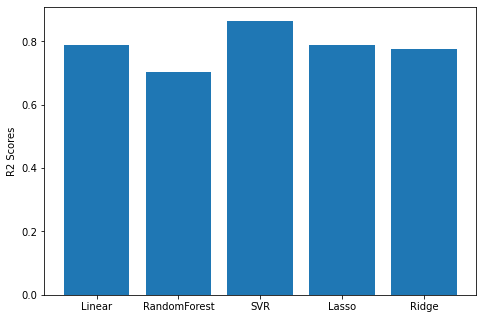

In [ ]:
#bar chart for all the model accuracy
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('R2 Scores')
ax.bar(Model_name,score)
plt.show()

# making predictions with the test data file

In [ ]:
p3_test_data=pd.read_csv('E:/ML Project/CE802_P3_Data/CE802_P3_Test.csv')

In [ ]:
p3_test_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.37,4.22,-4.05,Very high,UK,83.43,-209.02,101.94,-17.16,2,7.89,10,2373.57,13.11,30843.16,-962.72,NaN
1,-39.37,7.72,-3.48,Very low,Rest,48.30,86.62,107.56,-11.00,18,1.86,10,1475.76,11.71,15657.13,-305.24,NaN
2,16.25,7.08,-5.31,Very low,Europe,1.98,-267.34,23.33,-14.66,8,25.92,6,192.93,17.60,10765.05,-857.16,NaN
3,23.08,5.82,-5.91,Very low,UK,11.49,-196.52,115.19,-12.14,2,12.87,0,2779.23,13.59,14778.80,-798.06,NaN
4,-21.30,15.14,-4.02,Medium,USA,0.60,-80.36,75.42,-8.86,10,4.26,8,-441.42,13.62,16328.25,-832.93,NaN


In [ ]:
p3_test_data_orig=p3_test_data.copy()

In [ ]:
p3_test_data_orig.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.37,4.22,-4.05,Very high,UK,83.43,-209.02,101.94,-17.16,2,7.89,10,2373.57,13.11,30843.16,-962.72,NaN
1,-39.37,7.72,-3.48,Very low,Rest,48.30,86.62,107.56,-11.00,18,1.86,10,1475.76,11.71,15657.13,-305.24,NaN
2,16.25,7.08,-5.31,Very low,Europe,1.98,-267.34,23.33,-14.66,8,25.92,6,192.93,17.60,10765.05,-857.16,NaN
3,23.08,5.82,-5.91,Very low,UK,11.49,-196.52,115.19,-12.14,2,12.87,0,2779.23,13.59,14778.80,-798.06,NaN
4,-21.30,15.14,-4.02,Medium,USA,0.60,-80.36,75.42,-8.86,10,4.26,8,-441.42,13.62,16328.25,-832.93,NaN


In [ ]:
p3_test_data_orig.shape

(1500, 17)

In [ ]:
p3_test_data.isnull().sum()

F1           0
F2           0
F3           0
F4           0
F5           0
F6           0
F7           0
F8           0
F9           0
F10          0
F11          0
F12          0
F13          0
F14          0
F15          0
F16          0
Target    1500
dtype: int64

In [ ]:
#creating dummies to convert categorical columns to integer
dummies1  = pd.get_dummies(p3_test_data['F4'])

In [ ]:
dummies1.drop(['Very low'], axis=1, inplace=True)

In [ ]:
dummies1.head()

,High,Low,Medium,Very high
0,0,0,0,1
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,1,0


In [ ]:
dummies2  = pd.get_dummies(p3_test_data['F5'])

In [ ]:
dummies2.drop(['Europe'], axis=1, inplace=True)

In [ ]:
dummies2.head()

,Rest,UK,USA
0,0,1,0
1,1,0,0
2,0,0,0
3,0,1,0
4,0,0,1


data normalization

In [ ]:
#dropping the categorical columns
p3_test_data=p3_test_data.drop(['F4','F5'],axis=1)
p3_test_data.head(5)

,F1,F2,F3,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.37,4.22,-4.05,83.43,-209.02,101.94,-17.16,2,7.89,10,2373.57,13.11,30843.16,-962.72,NaN
1,-39.37,7.72,-3.48,48.30,86.62,107.56,-11.00,18,1.86,10,1475.76,11.71,15657.13,-305.24,NaN
2,16.25,7.08,-5.31,1.98,-267.34,23.33,-14.66,8,25.92,6,192.93,17.60,10765.05,-857.16,NaN
3,23.08,5.82,-5.91,11.49,-196.52,115.19,-12.14,2,12.87,0,2779.23,13.59,14778.80,-798.06,NaN
4,-21.30,15.14,-4.02,0.60,-80.36,75.42,-8.86,10,4.26,8,-441.42,13.62,16328.25,-832.93,NaN


In [ ]:
#storing the feature columns
X_normalised_test= p3_test_data.drop(["Target"],axis=1)
X_normalised_test.head(5)

,F1,F2,F3,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16
0,-39.37,4.22,-4.05,83.43,-209.02,101.94,-17.16,2,7.89,10,2373.57,13.11,30843.16,-962.72
1,-39.37,7.72,-3.48,48.30,86.62,107.56,-11.00,18,1.86,10,1475.76,11.71,15657.13,-305.24
2,16.25,7.08,-5.31,1.98,-267.34,23.33,-14.66,8,25.92,6,192.93,17.60,10765.05,-857.16
3,23.08,5.82,-5.91,11.49,-196.52,115.19,-12.14,2,12.87,0,2779.23,13.59,14778.80,-798.06
4,-21.30,15.14,-4.02,0.60,-80.36,75.42,-8.86,10,4.26,8,-441.42,13.62,16328.25,-832.93


In [ ]:
#creating a list of headers 
col_names_xt = list(X_normalised_test.columns)
col_names_xt

['F1',
 'F2',
 'F3',
 'F6',
 'F7',
 'F8',
 'F9',
 'F10',
 'F11',
 'F12',
 'F13',
 'F14',
 'F15',
 'F16']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# perform a robust scaler transform of the dataset
trans_xt = MinMaxScaler()
#trans_y = MinMaxScaler()
data_xt = trans_xt.fit_transform(X_normalised_test)
#data_y = trans_y.fit_transform(Y_normalised)
#we are normalizing only the X as we are doing the prediction

In [ ]:
data_xt

array([[0.34342504, 0.1152968 , 0.60527578, ..., 0.44453642, 0.78971403,
        0.43431714],
       [0.34342504, 0.21518265, 0.61438849, ..., 0.41556291, 0.45080377,
        0.73667074],
       [0.64465988, 0.19691781, 0.58513189, ..., 0.53745861, 0.34162605,
        0.48286074],
       ...,
       [0.3864818 , 0.1152968 , 0.65611511, ..., 0.44101821, 0.46280486,
        0.43609683],
       [0.24176776, 0.58333333, 0.3736211 , ..., 0.50972682, 0.55372105,
        0.49844105],
       [0.39731369, 0.16666667, 0.68393285, ..., 0.38555464, 0.43048124,
        0.61804795]])

In [ ]:
#converting the array into a dataframe
dataset_t = pd.DataFrame(data_xt,columns=col_names_xt)
dataset_t.head(5)

,F1,F2,F3,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16
0,0.343425,0.115297,0.605276,0.000768,0.453514,0.512124,0.405405,0.1,0.144209,0.454545,0.794248,0.444536,0.789714,0.434317
1,0.343425,0.215183,0.614388,0.000444,0.823851,0.538898,0.571892,0.9,0.032294,0.454545,0.646896,0.415563,0.450804,0.736671
2,0.644660,0.196918,0.585132,0.000018,0.380458,0.137630,0.472973,0.4,0.478842,0.272727,0.436354,0.537459,0.341626,0.482861
3,0.681651,0.160959,0.575540,0.000106,0.469172,0.575247,0.541081,0.1,0.236637,0.000000,0.860826,0.454470,0.431202,0.510039
4,0.441291,0.426941,0.605755,0.000006,0.614681,0.385784,0.629730,0.5,0.076837,0.363636,0.332242,0.455091,0.465781,0.494003


In [ ]:
#combining the normilized data with the dummies
norm_df_test=pd.concat([dataset_t,dummies1,dummies2],axis=1)
norm_df_test.head(5)

,F1,F2,F3,F6,F7,F8,F9,F10,F11,F12,...,F14,F15,F16,High,Low,Medium,Very high,Rest,UK,USA
0,0.343425,0.115297,0.605276,0.000768,0.453514,0.512124,0.405405,0.1,0.144209,0.454545,...,0.444536,0.789714,0.434317,0,0,0,1,0,1,0
1,0.343425,0.215183,0.614388,0.000444,0.823851,0.538898,0.571892,0.9,0.032294,0.454545,...,0.415563,0.450804,0.736671,0,0,0,0,1,0,0
2,0.644660,0.196918,0.585132,0.000018,0.380458,0.137630,0.472973,0.4,0.478842,0.272727,...,0.537459,0.341626,0.482861,0,0,0,0,0,0,0
3,0.681651,0.160959,0.575540,0.000106,0.469172,0.575247,0.541081,0.1,0.236637,0.000000,...,0.454470,0.431202,0.510039,0,0,0,0,0,1,0
4,0.441291,0.426941,0.605755,0.000006,0.614681,0.385784,0.629730,0.5,0.076837,0.363636,...,0.455091,0.465781,0.494003,0,0,1,0,0,0,1


In [ ]:
X_norm_test= norm_df_test.drop(["F3"],axis=1)# F3 is dropped as part of feature selection since it has the least correlation

In [ ]:
X_norm_test.head(5)

,F1,F2,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,High,Low,Medium,Very high,Rest,UK,USA
0,0.343425,0.115297,0.000768,0.453514,0.512124,0.405405,0.1,0.144209,0.454545,0.794248,0.444536,0.789714,0.434317,0,0,0,1,0,1,0
1,0.343425,0.215183,0.000444,0.823851,0.538898,0.571892,0.9,0.032294,0.454545,0.646896,0.415563,0.450804,0.736671,0,0,0,0,1,0,0
2,0.644660,0.196918,0.000018,0.380458,0.137630,0.472973,0.4,0.478842,0.272727,0.436354,0.537459,0.341626,0.482861,0,0,0,0,0,0,0
3,0.681651,0.160959,0.000106,0.469172,0.575247,0.541081,0.1,0.236637,0.000000,0.860826,0.454470,0.431202,0.510039,0,0,0,0,0,1,0
4,0.441291,0.426941,0.000006,0.614681,0.385784,0.629730,0.5,0.076837,0.363636,0.332242,0.455091,0.465781,0.494003,0,0,1,0,0,0,1


In [ ]:
X_norm_test.shape

(1500, 20)

In [ ]:
model_t

SVR(C=1000, gamma=0.01)

In [ ]:
Y_pred=model_t.predict(X_norm_test)

In [ ]:
Y_pred.shape

(1500,)

In [ ]:
Y_pred=Y_pred.reshape(-1,1)

In [ ]:
Y_pred

array([[0.47526202],
       [0.23314396],
       [0.14405761],
       ...,
       [0.0830776 ],
       [1.15518878],
       [0.28037241]])

In [ ]:
#inversing the normilization
y_inv = trans_y.inverse_transform(Y_pred)

In [ ]:
y_inv.shape

(1500, 1)

In [ ]:
y_inv

array([[1882.04233857],
       [ 923.2524085 ],
       [ 570.46955919],
       ...,
       [ 328.98812437],
       [4574.55910421],
       [1110.27754036]])

In [ ]:
#storing the predictions made in the original test file
p3_test_data_orig.loc[:,'Target']=y_inv

In [ ]:
p3_test_data_orig.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.37,4.22,-4.05,Very high,UK,83.43,-209.02,101.94,-17.16,2,7.89,10,2373.57,13.11,30843.16,-962.72,1882.042339
1,-39.37,7.72,-3.48,Very low,Rest,48.30,86.62,107.56,-11.00,18,1.86,10,1475.76,11.71,15657.13,-305.24,923.252408
2,16.25,7.08,-5.31,Very low,Europe,1.98,-267.34,23.33,-14.66,8,25.92,6,192.93,17.60,10765.05,-857.16,570.469559
3,23.08,5.82,-5.91,Very low,UK,11.49,-196.52,115.19,-12.14,2,12.87,0,2779.23,13.59,14778.80,-798.06,1438.506710
4,-21.30,15.14,-4.02,Medium,USA,0.60,-80.36,75.42,-8.86,10,4.26,8,-441.42,13.62,16328.25,-832.93,764.868141


In [ ]:
#exporting the test file with predictions 
p3_test_data_orig.to_csv('E:/ML Project/CE802_P3_Test.csv',index=False)